In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from PIL import Image
import cv2

(50000, 32, 32, 3)
(50000, 1)


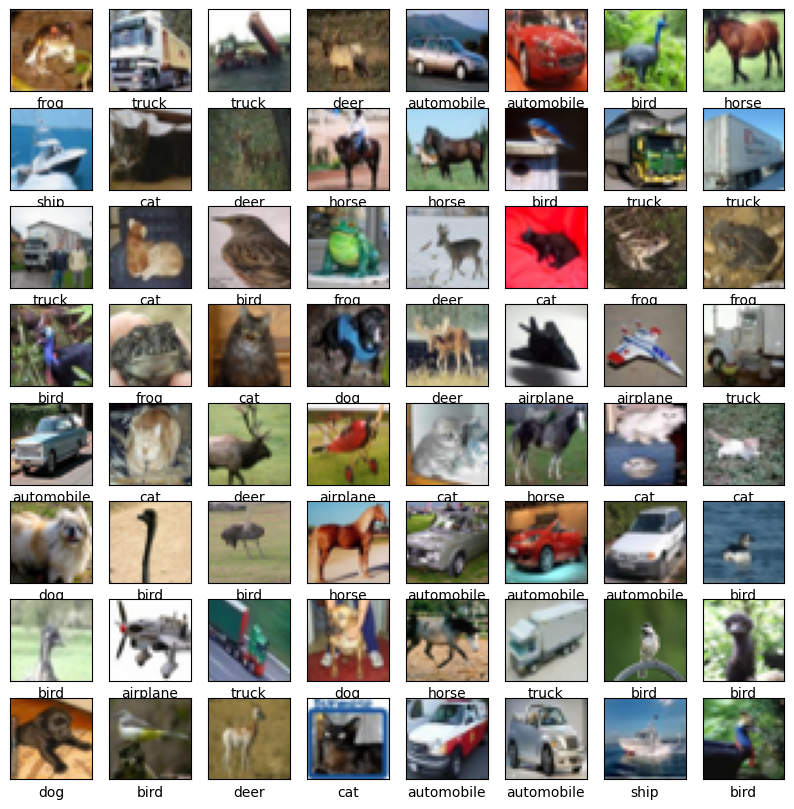

In [2]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape)
print(y_train.shape)

plt.figure(figsize=(10, 10))
for i in range(64):
  plt.subplot(8, 8, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.xlabel(class_names[y_train[i][0]])
  plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [3]:
#------------------------------------------------------------------------------
# Preprocessing Train & Test Data
#------------------------------------------------------------------------------
x_train_normalized = x_train / 255.0              # 標準化
y_train_categorized = to_categorical(y_train)     # 単位行列化

x_test_normalized = x_test / 255.0                # 標準化
y_test_categorized = to_categorical(y_test)       # 単位行列化

#------------------------------------------------------------------------------
# Build Data Model
#------------------------------------------------------------------------------
model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#------------------------------------------------------------------------------
# Main
#------------------------------------------------------------------------------
model.fit(x_train_normalized, y_train_categorized, epochs=10, batch_size=100)
loss_value, acc_score = model.evaluate(x_test_normalized, y_test_categorized)
y_pred = model.predict(x_test_normalized)

print(f'Accuracy Score: {acc_score:.4f}')
print(np.argmax(y_test_categorized[:10], axis=1))
print(np.argmax(y_pred[:10], axis=1))

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.3681 - loss: 1.7299
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.6163 - loss: 1.0821
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - accuracy: 0.6932 - loss: 0.8858
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - accuracy: 0.7331 - loss: 0.7645
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 23s 46ms/step - accuracy: 0.7686 - loss: 0.6641
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - accuracy: 0.7970 - loss: 0.5819
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.8318 - loss: 0.4861
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.8545 - loss: 0.4217
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.8753 - loss: 0.3599
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.8983 - loss: 0.2959
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7484 - loss: 0.8791
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Acc

In [4]:
model.save('./model_cifar-10.keras')

In [5]:
model = load_model('./model_cifar-10.keras')

# model.compile(optimizer='adam', 
#              loss='categorical_crossentropy', 
#              metrics=['accuracy'])

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       524,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,854,752 (7.08 MB)

 Trainable params: 618,250 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,236,502 (4.72 MB)

None


In [6]:
image = Image.open('./samoyed.jpg')          # 画像の読み込み
image_resized = image.resize((32, 32))       # 32 * 32 にリサイズ

image_array = np.array(image_resized)                  # ベクトル化
image_array = image_array.astype('float32') / 255.0    # 標準化
image_array = np.expand_dims(image_array, axis=0)      # 次元の追加 (※)

print(image_array.shape)                     # データ構造の表示

# ※... Keras/TensorFlow の Conv2D は 4 次元入力を前提
# 　　　単一画像でも (H, W, C) ではなく (1, H, W, C) を渡す必要がある

(1, 32, 32, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
(1, 32, 32, 3)
[5]


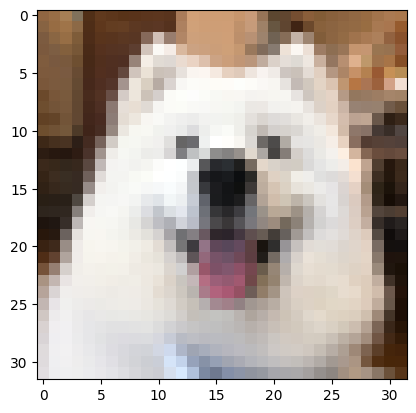

In [7]:
y_pred = model.predict(image_array)

plt.imshow(image_resized)                    # 画像の表示
print(image_array.shape)                     # データ構造の表示
print(np.argmax(y_pred, axis=1))             # 予測したクラス

In [8]:
image = cv2.imread('./maine_coon.jpg')           # 画像の読み込み     
image_resized = cv2.resize(image, (32, 32))      # 32 * 32 にリサイズ

image_array = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)    # OpenCV は BGR なので RGB に変換
image_array = image_array.astype('float32') / 255.0             # 標準化
image_array = np.expand_dims(image_array, axis=0)               # 次元の追加

print(image_array.shape)                         # データ構造の表示 (※)

# ※... Keras/TensorFlow の Conv2D は 4 次元入力を前提
# 　　　単一画像でも (H, W, C) ではなく (1, H, W, C) を渡す必要がある

(1, 32, 32, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
(1, 32, 32, 3)
[3]


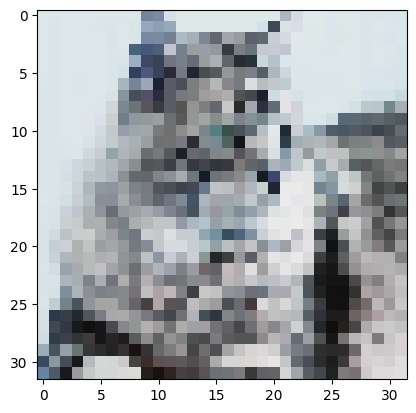

In [9]:
y_pred = model.predict(image_array)

plt.imshow(image_resized)                    # 画像の表示
print(image_array.shape)                     # データ構造の表示
print(np.argmax(y_pred, axis=1))             # 予測したクラス